# CSC 421 - Searching 

### Instructor: Shengyao Lu 


## Solving Problems by Searching 

During this unit we will cover the following topics: 

1. Problem-solving agents 
2. Example problems 
3. Search algorithms 
4. Uninformed search strategies 
5. Informed (Heuristic) search strategies 
6. Heuristic functions 




# WORKPLAN 

The section number is based on the 4th edition of the AIMA textbook and is the suggested
reading for this week. Each list entry provides just the additional sections. For example the Expected reading include the sections listed under Basic as well as the sections listed under Expected. Some additional readings are suggested for Advanced. 

1. Basic: Sections **3.1**, **3.2**, **3.3**, **3.4.1**, **3.4.2**, **3.4.3**, **3.5.2**, **3.6.1**, **3.6.2** and **Summary**
2. Expected: **3.4.4**, **3.4.5**, **3.4.6**
3. Advanced: All the chapter including bibligraphical and historical notes 

## 1. Problem-Solving Agents

When the correct action to take is not obvious, an agent may need to <mark>plan ahead</mark>.
- **Problem-solving agent**: uses *atomic* representations plan ahead. It tries to figure out *a sequence of actions* to reach the *goal state*.
- **Search**: the computational process by which a problem-solving agent plans ahead. (<mark>States and actions are generally treated as atomic.</mark>)
- **Planning agent:** (not the topic of this search chapter) uses factored or structured representations of states to plan ahead and does reasoning along the way.


### Assumptions in this chapter
1. We consider only the simplest computation environments: episodic, single agent, fully observable, deterministic, static, discrete, and known.
2. The action costs are additive. 

<details>
<summary><b>Recall–❓Q1: What assumptions about the <mark>task environment</mark> are typically made when we solve a problem using dynamic programming (DP)?</b></summary>

Agents that use dynamic programming typically operate in 
- sequential, 
- deterministic, 
- fully observable, 
- discrete, 
- known, and 
- static 
environments.

</details>

<details>
<summary><b>❓Q2: What assumptions are typically made about the <mark>computation environment</mark> of the typical Search algorithm?</b></summary>

Search algorithms typically operate in 
- episodic, (each search run is a single, self-contained planning episode)
- deterministic, 
- fully observable, 
- discrete, 
- known, and 
- static 
environments.

When does search algorithm no longer operate in an episodic computation env?
* online-searching
* replanning
* real-time search
* interleave planning and acting
</details>

- - - 

## 2. Search problems 

A state space $S$ is the set of all possible states for the problem.



### Five parts of a search problem
* initial state $s_0$ for $s_0 \in S$
* Action space $A$, with each action $\forall a\in A$
* Goal state(s) $s_{goal}$, for $s_{goal}\in S$, and corresponding "goal test" to determine whether a given state is a goal state 
* transition model **RESULTS($s,a$)->$s^\prime$** returns the state **$s^\prime$** that results from doing action **$a$** in state **$s$**
* action cost function **ACTION-COST($s$,$a$,$s^\prime$)** returns a numeric cost of applying action **$a$** when in state **$s$** to reach state **$s^\prime$** 



### Graphs are your friend 
A **state space graph** represents the env of a search problem. The state space can be represented as a **graph** in which the vertices are the states, and the directed edges between them are actions.   
A sequence of actions forms a **path**. A **solution** is a path from the initial state to a goal state.   
Actions costs are additive. **Optimal solution** has the lowest path cost among all solutions.    

### Example: Vacuum world 

<img src="images/vacuum.png" width="500px">

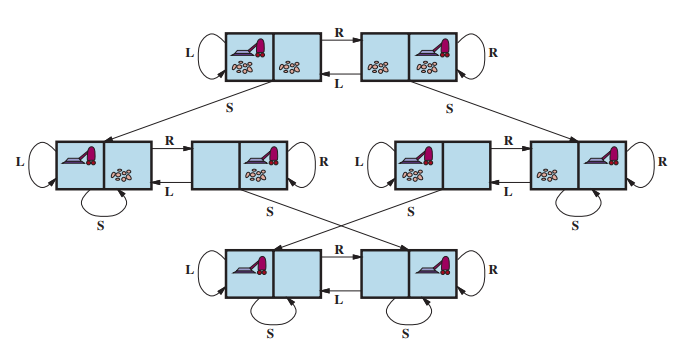

* **States**: 8 possible world states (two locations, agent position, dirt locations). More generally $n \times 2^n$ states when there are $n$ locations 
* **Initial state**: Any state
* **Actions** Each state has just three actions: *Left*, *Right*, *Suck*
* **Transition Model** each actions has the usual effect except when the agent can't move on the left or right edge or there is no dirt in which case the state remains the same
* **Goal test**: Checks that all the squares are clean
* **Path cost** Each step costs 1, so the path cost is the number of steps in the path

### Example: Knuth Infinite State Space 

Knuth conjectured that starting with the number 4, a sequence of repeated applications of factorial, square root, and floor operations will reach any desired positive integer. For example, one can reach 5 from 4 as follows: 

$$
\left \lfloor \sqrt{\sqrt{\sqrt{\sqrt{\sqrt{(4!)!}}}}} \right \rfloor = 5 
$$

The problem definition is: 

* **States**: Positive numbers
* **Initial state**: 4
* **Actions**: Apply factorial, square root, or floor operation (factorial for integers only)
* **Transition model** Use the mathematical definitions of the operations
* **Goal test**: The state is the desired positive integer
  
Really large numbers can be constructed in the process of reaching a given target and the state space is infinite. For example according to the textbook the number $620,448,401,733,239,439,360,000$ is generated in the expression for reaching $5$. 


### Example: Map of Romania
1. Goal formulation: reach Bucharest from Arad
2. Problem formulation: description of states and actions - abstract model of problem 
3. Search: Simulate sequences of actions in its model until solution reaching goal is found 
4. Execution: Execute the actions in the solution - one at a time 

<img src="images/romania_map.png" width="800px"> 

* State space($S$): all possible states ($\forall s\in S$) (all cities of the map) 
* Initial state: (start city) 
* Goal states (end city or cities) 
* Actions: **ACTIONS($s$)** returns finite set of actions that can be executed in **$s$**. 
* Transition model: **RESULTS($s,a$)->$s^\prime$** returns the state **$s^\prime$** that results from doing action **$a$** in state **$s$** 
* Action cost function: **ACTION-COST($s$,$a$,$s^\prime$)** returns a numeric cost of applying action **$a$** when in state **$s$** to reach state **$s^\prime$** 


## 3. Search Algorithm

A search algorithm takes as input a search problem and returns a solution or failure if none can be found. 

**Search tree** algorithms superimpose a search tree over the state-space graph, forming various paths from the initial state, trying to find a path that reaches a goal state. 

**IMPORTANT** distinction between state space and search tree. The state space describes the potentially infinite set of states in the world, and the actions that allow transitions from one state to the other. The search tree describes paths between these states, reaching toward the goal. The search tree can have multiple nodes corresponding to any given state but each node in the tree has a unique path back to the root. 

In a word:
- a node in a search tree = a state in the state space
- an edge in the search tree = an action in the action space
- root node = intial state



### Terminologies

1. **Node:** a data structure that keeps track of 
    - node.STATE
    - node.PARENT (another node that generated this node)
    - node.ACTION (action applied to parent to get node, usually viewed as an edge in the graph)
    - node.PATH_COST (total cost of the path from the initial state to this node)

2. **Expand:** Each node is **expanded** by considering the available **actions** and using the **RESULT** function to see where those lead to and then **generating** a new node (called a **child node**) for each of the resulting states. Each child has a parent node. The **search strategy** defines which state to expand next. 

3. **Frontier:** The set of all leaf nodes available for expansion at any given point. 

4. **Queue:** The data structure used to store nodes during the formation of the search tree is a **queue**.
    * IS-EMPTY(frontier)
    * POP(frontier): remove top node from the frontier and returns it
    * TOP(frontier): returns (but does not remove) the top node from the frontier 
    * ADD(node, frontier): inserts node into its proper place in the queue 


**Note** : Redundant paths: cycles/redundant paths arise naturally in many problems 
For example consider a 10x10 grid with the ability to move to any of the adjacent 8 squares. 
Number of paths of length 9 is almost 8^9 (> 100 million). 

* **GRAPH_SEARCH**: checks for redundant paths 
* **TREE_SEARCH**: does not check for redundant paths

A **state** is a representation of a physical
configuration

A **node** is a data structure constituting part of a
search tree including (parent, children, depth, cost
g(x))

States do not have parents, children or costs 

<img src="images/state_vs_node.png" width="500px"> 

### Approach

**General approach:** 
1. start with a frontier that contains the initial state.
2. start with an empty explored set
3. repeat:
    - if the frontier is empty, then no solution
    - remove a node from the frontier
    - if node contains goal state, return the solution
    - add the node to the explored set
    - expand node, add resulting nodes to the frontier if they aren't already in the frontier or the explored set

**Categories:**

* Uninformed search: 
    * not having sense of "how far it is" from current state to the goal state
    * not use heuristic functions
    * Relies only on the problem formulation (states, actions, path cost, goal test)
    * Has no guidance toward the goal beyond systematic exploration
* Informed search:
    * Uses a heuristic function to estimate how far the current state is from the goal
    * Provides directional guidance toward promising states in the search space
* Best-first search:
    * maintain a **priority queue/priority function** during the search
    * can be either informed or uninformed



### Measuring problem-solving performance 

A search strategy is defined by picking the order of node expansion

Strategies are evaluated along the following dimensions:
* **completeness**: does it always find a solution if one exists?
* **time complexity**: number of nodes and edges generated
* **space complexity**: maximum number of nodes in memory
* **optimality**: does it always find a least-cost solution?

## 4. Uninformed Search 

- Breadth-first search: expands the shallowest nodes first, pops with FIFO.
- Depth-first search: expands the deepest unexpanded nodes first, pops with LIFO. 
- Iterative deepening search: calls depth-first search with increasing depth limits until a goal is found.
- Dijkstra's: expands the node with lowest path cost, using a priority function $g(n)$.

## 5. Informed Search

**Main Idea**: use an evaluation function $f(n)$ for each node – <mark>estimate</mark> of **“desirability”**. Expand most desirable unexpanded node.


Implementation:

Frontier is a queue sorted in decreasing order of desirability

Examples: 

1. **Greedy best-first search**: $f(n) = h(n)$: select the closet node to the goal according to the heuristic 
2. **A\* search:** $f(n) = g(n) + h(n)$: select the closest node to the goal according to the heuristic, while <mark>taking into account the sum of the path cost from the start to the node</mark>
3. **IDA\* (iterative deepening A\* search):** iterative deepening version of A\*, address the space complexity issue of A\*.

### Heuristics 

* **Admissible heuristic**: is one that never overestimates the cost to reach a goal 
* **Consistent heuristic**: h(n) <= c(n,a,n') + h(n'), a form of triangle inequality 


For real world problems coming up with a good heuristic can reduce significanlty search times but is not trivial. 
A good approach is to think about relaxed versions of the problem. 

### 8-puzzle, heuristic functions, and relaxed problems 




Consider the tiling 8-puzzle. The object of the puzzle is to slide the tiles horizontally or vertically into the empty space until the configuration matches the goal configuration. There are 9!/2 = 181400 reachable states. For k-puzzle problems there are two commonly used heuristics: 

1. **h1** number of misplaced tiles - admissible because any tile that is out of place will require at least one move 
2. **h2**: sum of the distances of the titles from their goal positions - city-block (Manhattan) distance 


<img src="images/eight-puzzle.png" width="600px"> 


For this example **h1** is 8 and **h2** is 3+1+2+2+2+3+3+2=18 and the true solution cost is 26. Both do not overestimate the true solution cost. 


Figure 3.26 in the book shows a comparison of the search costs using BFS, A* with h1, and A* with h2. Data are averaged over 100 puzzles for each solution length d from 6 to 28 

| d  | BFS    | A*(h1) | A*(h2) |
|----|--------|--------|--------|
| 6  | 128    | 24     | 19     |
| 8  | 368    | 48     | 31     |
| 10 | 1033   | 116    | 48     |
| 12 | 2672   | 279    | 84     |
| 14 | 6783   | 678    | 174    |
| 16 | 17270  | 1683   | 364    |
| 18 | 41558  | 4102   | 751    |
| 20 | 91493  | 9905   | 1318   |
| 22 | 175921 | 22955  | 2548   |
| 24 | 290082 | 53039  | 5733   |
| 26 | 395355 | 110372 | 10080  |
| 28 | 463234 | 202565 | 22055  |



**h1** and **h2** can also be viewed as accurate path lengths for simplified versions of the puzzle. Move square anywhere corresponds to **h1** and move one square in any direction even onto occupied space corresponds to **h2**. 


Removal of restrictions creates added edges to the state-space graph that can result in "short-cuts" providing 
"better" solution - the optimal solution to the original problem will still be a solution for the relaxed problem. 


### A* in modern computer games 



* Simplifying search space without compromising 
    * Hierarchical path finding 
    * Waypoints 
    * Navigation mesh 
* Memory issues 
    * Node bank 
    * IDA*
* Game examples 
    * Age of empires 
    * Civilization 
    * World of Warcraft 
    
<img src="images/waypoint.png" width="600px"> 


<img src="images/age_of_empires.png" width="500px"> 

PSEUDO-CODE FOR BEST-FIRST SEARCH 


~~~
function BEST-FIRST-SEARCH(problem, f ) returns a solution node or failure
    node ← NODE(STATE=problem.INITIAL)
    frontier ← a priority queue ordered by f , with node as an element
    reached ←a lookup table, with one entry with key problem.INITIAL and value node
    while not IS-EMPTY(frontier ) do
        node ← POP(frontier )
        if problem.IS-GOAL(node.STATE) then return node
        for each child in EXPAND(problem, node) do
            s ← child.STATE
            if s is not in reached or child.PATH-COST < reached[s].PATH-COST then
                reached[s] ←child
    add child to frontier
return failure

~~~


## 6. Summary


| Search Algorithm                     | Uninformed? | Informed? | Best-First? | Memory-bounded? | Queue/function                         |
|--------------------------------------|-------------|-----------|-------------|-----------------|----------------------------------------|
| Breadth-first Search (BFS)           | ✅           |           |             |                 | FIFO                                   |
| Depth-first Search (DFS)             | ✅           |           |             |                 | LIFO                                   |
| Depth Limited                        | ✅           |           |             |                 | LIFO, with depth cutoff                |
| Iterative Deepening                  | ✅           |           |             |                 | LIFO, with depth cutoff                |
| Dijkstra's/Uniform-cost search (UCS) | ✅           |           | ✅           |                 | priority queue, $g(n)$                   |
| Greedy best-first search             |             | ✅         | ✅           |                 | Priority queue, $h(n)$                  |
| A\* search                            |             | ✅         | ✅           |                 | Priority queue, $g(n)+h(n)$              |
| Weighted A* Search                   |             | ✅         | ✅           |                 | Priority queue, $g(n)+w\cdot h(n)$ |
| Beam Search                          |             | ✅         | ✅           | ✅               | Priority queue (keep top-k by $h$ or $f$)  |
| Iterative-deepening A* search (IDA*) |             | ✅         |             | ✅               | DFS + $f(n)=g+h$ cutoff                  |



<img src="images/uninformed_search_comparison.png" width="700px"> 

Time and space complexity:
* **b**: maximum branching factor of the search tree
* **d**: depth of the least-cost solution
* **m**: maximum depth of the state space (can be infinite) 